In [2]:
%cd ..

/home/zarizky/projects/neural-autoregressive-object-co-occurrence


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import torch

import utils
from EinsumNetwork import EinsumNetwork, Graph

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [3]:
params = torch.load("outputs/test-model-em/mixture-1-seed-0-params.pt")

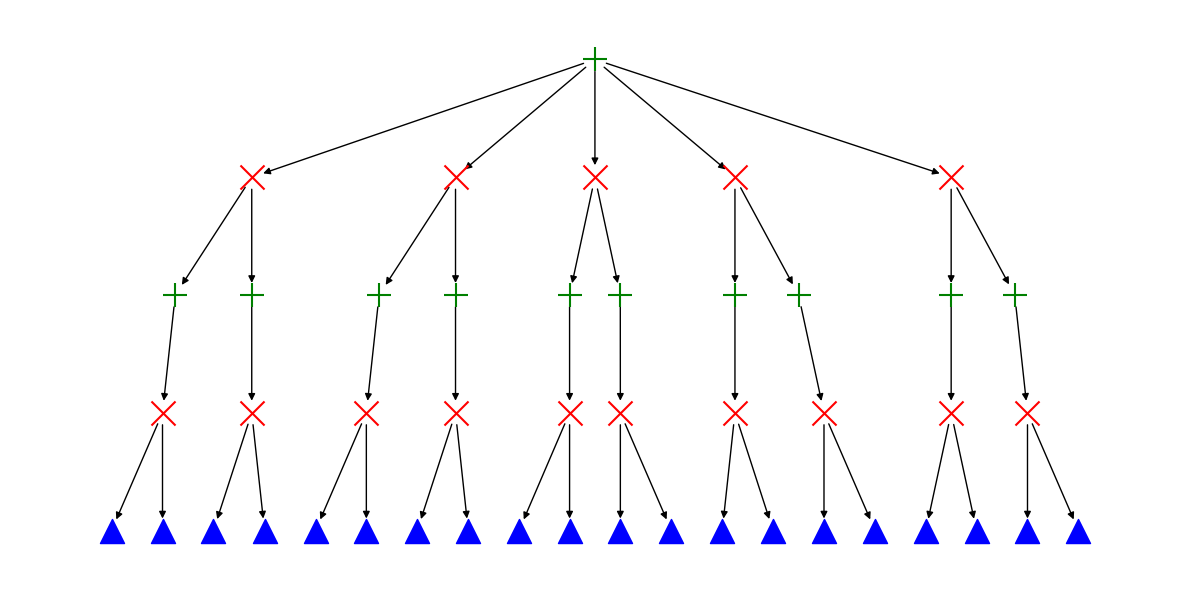

In [4]:
sums = Graph.get_sums(params["region_graph"])
products = Graph.get_products(params["region_graph"])
dists = Graph.get_leaves(params["region_graph"])

layout = nx.nx_agraph.pygraphviz_layout(params["region_graph"], prog="dot")

plt.figure(figsize=(12, 6))
plt.box(False)

nx.draw_networkx_nodes(
    params["region_graph"], layout, products, node_shape="x", node_color="red"
)
nx.draw_networkx_nodes(
    params["region_graph"], layout, sums, node_shape="+", node_color="green"
)
nx.draw_networkx_nodes(
    params["region_graph"], layout, dists, node_shape="^", node_color="blue"
)
nx.draw_networkx_edges(params["region_graph"], layout)

plt.tight_layout()

In [5]:
model = utils.einet.EiNetForest(params["region_graph"], params["args"])
model.initialize()
model.load_state_dict(params["params"])

<All keys matched successfully>

In [6]:
dataset = utils.dataset.ObjectCooccurrenceCOCODataset(
    "dataset/coco2017-cooccurences-valid.csv"
)

dataloader = torch.utils.data.DataLoader(dataset, 8196, num_workers=4)

log_likelihood = utils.einet.log_likelihood(dataloader, model, device)
log_posterior = utils.einet.log_posterior(dataloader, model, device)

In [7]:
-log_likelihood / len(dataset), -log_posterior / len(dataset),

(13.542178125, 12.85493274154663)

In [ ]:
%cd ..
import torch

from made import MADE, MaskedAutoregressiveLinear

made = MADE(MaskedAutoregressiveLinear(4, 32), MaskedAutoregressiveLinear(32, 4))
for _ in range(5):
    z = made(torch.rand(128, 4, 1))

/home/zarizky/projects/neural-autoregressive-object-co-occurrence
tensor([2, 1, 3, 4]) tensor([ 4,  0, 21, 32])
tensor([3, 2, 1, 4]) tensor([15,  9,  0, 32])
tensor([1, 4, 2, 3]) tensor([ 0, 32, 13, 27])
tensor([2, 3, 4, 1]) tensor([ 8, 20, 32,  0])
tensor([4, 1, 3, 2]) tensor([32,  0, 15,  6])
